In [1]:
using Pkg
Pkg.activate(".")
#Pkg.add("BenchmarkTools")

  Activating project at `~/Desktop/PhD_Stuff/cheb_bessel_tests-main`


In [2]:
using BenchmarkTools
using LinearAlgebra
using DataInterpolations
using SpecialFunctions
using HCubature
using QuadGK
using Polynomials
using Plots
using FastChebInterp
using ProgressBars
using LaTeXStrings
using Bessels
using Tullio
using FFTW
using LoopVectorization
using NPZ

[ Info: Precompiling BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]
[ Info: Precompiling HCubature [19dc6840-f33b-545b-b366-655c7e3ffd49]
[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
Precompiling IJuliaExt
  ✓ Plots → FileIOExt
  ✓ Plots → UnitfulExt
  ✓ Plots → IJuliaExt
  3 dependencies successfully precompiled in 46 seconds. 177 already precompiled.
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]
┌ Warning: Module Plots with build ID fafbfcfd-b40e-aa9a-0006-8c27a293ba16 is missing from the cache.
│ This may mean Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1942
[ Info: Skipping precompilation since __precompile__(false). Importing IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a].
[ Info: Precompiling FastChebInterp [cf66c380-9a80-432c-aff8-4f9c79c0bdde]
[ Info: Precompiling SpecialFunctionsChainRulesCoreExt [9eb7bdd4-e44c-55fc-b9cc-1a32cb715188

In [3]:
#Polynomial Approximation of P(k)
function TGA(k, ωb, ωm)
    y = k / (ωm - ωb)
    return (1 + 56.4933 * y^1.48261 + 3559.23* y^3.76407 + 4982.44 *y^5.68246 + 374.167* y^7.14558)^(-0.25)
end

function Pk(k, ωb, ωm, ns)
    return k^ns * TGA(k, ωm, ωb)^2
end

#@benchmark TGA($1, $0.02, $0.1)

Pk (generic function with 1 method)

In [4]:
#Cheb interpolant in log(k)---->To use FFTlog
kmax = 200/13 #N5K challenge values
kmin = 2.5/7000
n_cheb = 128
k = LinRange(kmin, kmax, 40000)
x = chebpoints(n_cheb, log10(kmin), log10(kmax))
c = chebinterp(Pk.(10 .^x, 0.15, 0.02, 0.96), log10(kmin), log10(kmax))

ChebPoly{1,Float64,Float64} order (128,) polynomial on [-3.4471580313422194,1.1870866433571445]

In [5]:
#This is the Chebyshev approximation of the function
plot(k, [Pk.(k, 0.15, 0.02, 0.96),c.(log10.(k))], xscale=:log10, yscale=:log10, title="P(k) and its Chebyshev interpolant", label=["P(k)" "c(k)"]) 
savefig("pk.png")

"/Users/sofiachiarenza/Desktop/PhD_Stuff/cheb_bessel_tests-main/pk.png"

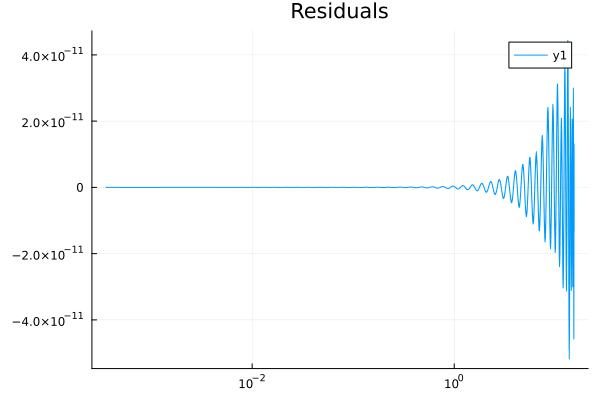

In [6]:
plot(k, 1 .-c.(log10.(k))./Pk.(k, 0.15, 0.02, 0.96), title="Residuals",  xscale=:log10)

### Testing Will

In [7]:
using Revise
using Will

Precompiling Will
  ✓ Will
  1 dependency successfully precompiled in 8 seconds. 210 already precompiled.


In [9]:
ℓ = 5
nχ = 25
χ = LinRange(13, 7000, nχ) 

25-element LinRange{Float64, Int64}:
 13.0, 304.125, 595.25, 886.375, 1177.5, …, 6126.62, 6417.75, 6708.88, 7000.0

In [10]:
result1 = zeros(nχ, nχ)
Will.double_bessel_integral_chi_grid!(result1, c, ℓ, χ, kmin, kmax)

Processing all combinations for i = 1
Processing all combinations for i = 2
Processing all combinations for i = 3
Processing all combinations for i = 4
Processing all combinations for i = 5
Processing all combinations for i = 6
Processing all combinations for i = 7
Processing all combinations for i = 8
Processing all combinations for i = 9
Processing all combinations for i = 10
Processing all combinations for i = 11
Processing all combinations for i = 12
Processing all combinations for i = 13
Processing all combinations for i = 14
Processing all combinations for i = 15
Processing all combinations for i = 16
Processing all combinations for i = 17
Processing all combinations for i = 18
Processing all combinations for i = 19
Processing all combinations for i = 20
Processing all combinations for i = 21
Processing all combinations for i = 22
Processing all combinations for i = 23
Processing all combinations for i = 24
Processing all combinations for i = 25


In [11]:
result2 = zeros(nχ, nχ)
f(x) = Pk.(10^x, 0.15, 0.02, 0.96)
Will.double_bessel_integral_chi_grid!(result2, f, ℓ, χ, kmin, kmax)

Processing all combinations for i = 1
Processing all combinations for i = 2
Processing all combinations for i = 3
Processing all combinations for i = 4
Processing all combinations for i = 5
Processing all combinations for i = 6
Processing all combinations for i = 7
Processing all combinations for i = 8
Processing all combinations for i = 9
Processing all combinations for i = 10
Processing all combinations for i = 11
Processing all combinations for i = 12
Processing all combinations for i = 13
Processing all combinations for i = 14
Processing all combinations for i = 15
Processing all combinations for i = 16
Processing all combinations for i = 17
Processing all combinations for i = 18
Processing all combinations for i = 19
Processing all combinations for i = 20
Processing all combinations for i = 21
Processing all combinations for i = 22
Processing all combinations for i = 23
Processing all combinations for i = 24
Processing all combinations for i = 25


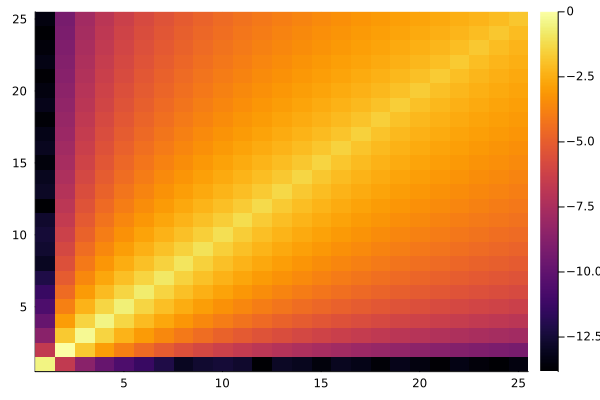

In [12]:
heatmap(log10.(abs.(result1./maximum(result1))))

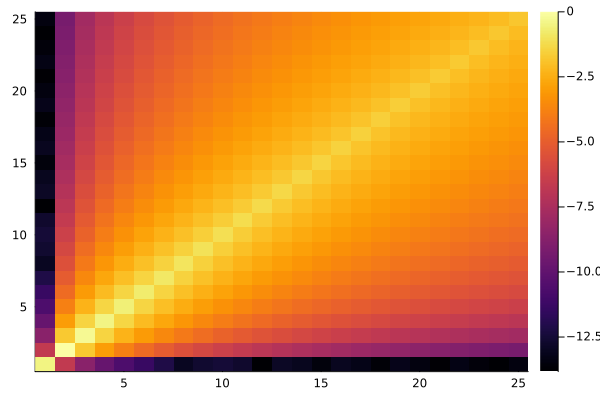

In [13]:
heatmap(log10.(abs.(result2./maximum(result2))))

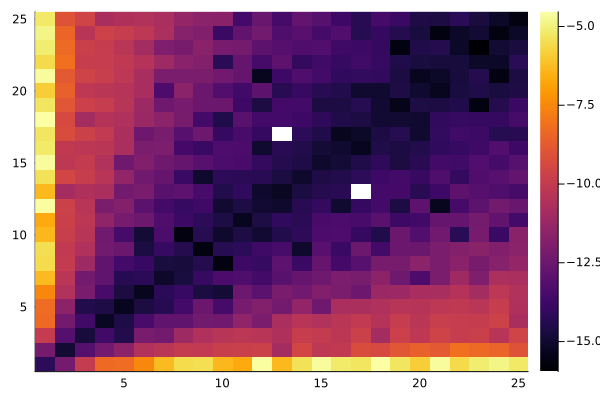

In [14]:
difference = 1 .- result1./result2;
heatmap(log10.(abs.(difference)))

In [15]:
# cheb_integral works in one bin, just a test
i=8
j=7
result = zeros(nχ, nχ)
@time w_ij = Will.cheb_integral(result, n_cheb, i, j, ℓ, χ, kmin, kmax, c)

  1.124454 seconds (116.73 k allocations: 67.356 MiB, 28.68% compilation time)


129-element Vector{Float64}:
  3.238523811630537e-5
 -2.0100808971205434e-5
 -7.893710731876637e-6
  3.079599037813131e-5
 -3.025381820600909e-5
  4.852163048260203e-6
  2.6404483105763466e-5
 -3.72719949111117e-5
  1.6409568973403363e-5
  2.0195004784213772e-5
 -4.057571078458476e-5
  2.5166304430555498e-5
  1.3380020508022066e-5
  ⋮
 -4.555830958305842e-6
  3.127777684036877e-6
  2.1361842040180404e-6
 -5.082567840547674e-6
  1.9212661928978442e-6
  3.473584075036511e-6
 -4.495198136019413e-6
  3.18814998698927e-7
  3.7580497919755877e-6
 -3.401139487947415e-6
 -4.129892410164123e-7
  3.5788220036386703e-6

In [ ]:
result = Will.w_ell!(n_cheb, ℓ, χ, kmin, kmax, c)

Processing all combinations for i = 1
Processing all combinations for i = 2
Processing all combinations for i = 3


In [ ]:
heatmap(log10.(abs.(result)))

### New workflow!

In [7]:
using Revise
using Will

### $\ell$ =5

In [8]:
ℓ = 5
nχ = 100
χ = LinRange(13, 7000, nχ) 

100-element LinRange{Float64, Int64}:
 13.0, 83.5758, 154.152, 224.727, …, 6788.27, 6858.85, 6929.42, 7000.0

In [9]:
T = zeros(1,nχ,nχ,n_cheb+1)
@time Will.T̃!(T, n_cheb, ℓ, χ, kmin, kmax, c)

Processing all combinations for i = 1
Processing all combinations for i = 2
Processing all combinations for i = 3
Processing all combinations for i = 4
Processing all combinations for i = 5
Processing all combinations for i = 6
Processing all combinations for i = 7
Processing all combinations for i = 8
Processing all combinations for i = 9
Processing all combinations for i = 10
Processing all combinations for i = 11
Processing all combinations for i = 12
Processing all combinations for i = 13
Processing all combinations for i = 14
Processing all combinations for i = 15
Processing all combinations for i = 16
Processing all combinations for i = 17
Processing all combinations for i = 18
Processing all combinations for i = 19
Processing all combinations for i = 20
Processing all combinations for i = 21
Processing all combinations for i = 22
Processing all combinations for i = 23
Processing all combinations for i = 24
Processing all combinations for i = 25
Processing all combinations for i 

In [10]:
npzwrite("T_tilde_l_5.npy", T)

In [11]:
coeff = zeros(nχ,nχ,n_cheb+1)
for i in 1:nχ
    for j in 1:nχ
        coeff[i,j,:]=c.coefs
    end
end

In [12]:
w = Will.w_ell_tullio(coeff,T)

1×100×100 Array{Float64, 3}:
[:, :, 1] =
 9.83245e-7  8.53419e-10  3.53224e-11  …  -2.79483e-20  -1.00929e-19

[:, :, 2] =
 8.53419e-10  3.66234e-6  3.53984e-7  4.50174e-8  …  2.74762e-18  2.57353e-18

[:, :, 3] =
 3.53224e-11  3.53984e-7  3.83295e-6  8.88948e-7  …  5.85515e-17  5.45711e-17

;;; … 

[:, :, 98] =
 8.54384e-20  2.92988e-18  6.28635e-17  …  4.64831e-8  3.92793e-8  3.18913e-8

[:, :, 99] =
 -2.79483e-20  2.74762e-18  …  3.92793e-8  4.56883e-8  3.86334e-8

[:, :, 100] =
 -1.00929e-19  2.57353e-18  …  3.18913e-8  3.86334e-8  4.49141e-8

In [13]:
@benchmark Will.w_ell_tullio(coeff,T)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  442.792 μs …   5.110 ms  ┊ GC (min … max): 0.00% … 85.01%
 Time  (median):     464.583 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   471.841 μs ± 102.480 μs  ┊ GC (mean ± σ):  0.69% ±  2.87%

      ▁▂▁  ▂▇█▄                                                  
  ▂▃▄▆███▇██████▆▆▅▅▅▅▆▅▅▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▂▂▂ ▃
  443 μs           Histogram: frequency by time          561 μs <

 Memory estimate: 80.75 KiB, allocs estimate: 49.

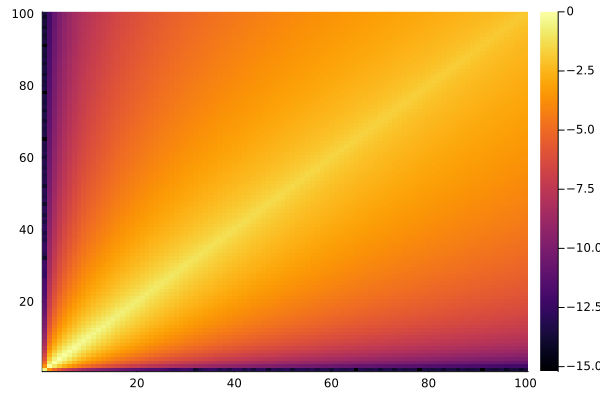

In [14]:
heatmap(log10.(abs.(w[1,:,:]./maximum(w))))

### $\ell$ =100

In [15]:
ℓ = 100
nχ = 100
χ = LinRange(13, 7000, nχ) 

100-element LinRange{Float64, Int64}:
 13.0, 83.5758, 154.152, 224.727, …, 6788.27, 6858.85, 6929.42, 7000.0

In [16]:
T = zeros(1,nχ,nχ,n_cheb+1)
@time Will.T̃!(T, n_cheb, ℓ, χ, kmin, kmax, c)

Processing all combinations for i = 1
Processing all combinations for i = 2
Processing all combinations for i = 3
Processing all combinations for i = 4
Processing all combinations for i = 5
Processing all combinations for i = 6
Processing all combinations for i = 7
Processing all combinations for i = 8
Processing all combinations for i = 9
Processing all combinations for i = 10
Processing all combinations for i = 11
Processing all combinations for i = 12
Processing all combinations for i = 13
Processing all combinations for i = 14
Processing all combinations for i = 15
Processing all combinations for i = 16
Processing all combinations for i = 17
Processing all combinations for i = 18
Processing all combinations for i = 19
Processing all combinations for i = 20
Processing all combinations for i = 21
Processing all combinations for i = 22
Processing all combinations for i = 23
Processing all combinations for i = 24
Processing all combinations for i = 25
Processing all combinations for i 

In [17]:
npzwrite("T_tilde_l_100.npy", T)

In [18]:
w = Will.w_ell_tullio(coeff,T)

1×100×100 Array{Float64, 3}:
[:, :, 1] =
 4.33515e-11  1.36002e-16  …  3.301e-20  7.16238e-20  8.82037e-21

[:, :, 2] =
 1.36002e-16  7.68234e-10  -1.39412e-17  …  -2.83811e-20  -3.64498e-21

[:, :, 3] =
 4.40455e-18  -1.39412e-17  1.72069e-9  …  1.50574e-20  1.88828e-21

;;; … 

[:, :, 98] =
 3.301e-20  -1.66899e-20  8.87644e-21  …  7.84971e-9  3.71385e-9  1.26319e-9

[:, :, 99] =
 7.16238e-20  -2.83811e-20  …  3.71385e-9  7.78742e-9  3.70732e-9

[:, :, 100] =
 8.82037e-21  -3.64498e-21  …  1.26319e-9  3.70732e-9  7.72564e-9

In [19]:
@benchmark Will.w_ell_tullio(coeff,T)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  448.750 μs …  4.831 ms  ┊ GC (min … max): 0.00% … 86.26%
 Time  (median):     469.084 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   474.662 μs ± 87.558 μs  ┊ GC (mean ± σ):  0.58% ±  2.84%

       ▃▄▁    ▄█▇▅                                              
  ▁▂▃▅████▇▅▅██████▅▄▃▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  449 μs          Histogram: frequency by time          542 μs <

 Memory estimate: 80.75 KiB, allocs estimate: 49.

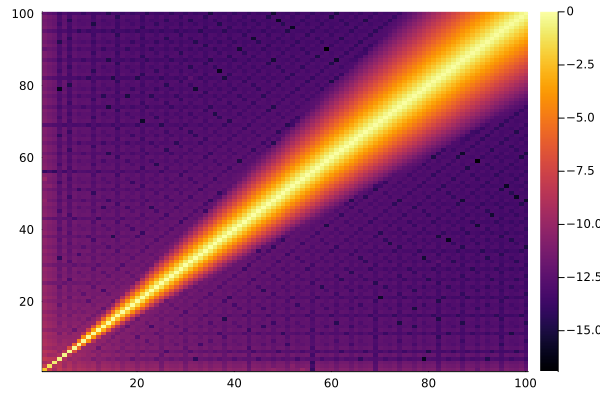

In [20]:
heatmap(log10.(abs.(w[1,:,:]./maximum(w))))

### $\ell$=200

In [21]:
ℓ = 200
nχ = 100
χ = LinRange(13, 7000, nχ) 

100-element LinRange{Float64, Int64}:
 13.0, 83.5758, 154.152, 224.727, …, 6788.27, 6858.85, 6929.42, 7000.0

In [ ]:
T = zeros(1,nχ,nχ,n_cheb+1)
@time Will.T̃!(T, n_cheb, ℓ, χ, kmin, kmax, c)

Processing all combinations for i = 1
Processing all combinations for i = 2
Processing all combinations for i = 3
Processing all combinations for i = 4
Processing all combinations for i = 5
Processing all combinations for i = 6
Processing all combinations for i = 7
Processing all combinations for i = 8
Processing all combinations for i = 9
Processing all combinations for i = 10
Processing all combinations for i = 11
Processing all combinations for i = 12
Processing all combinations for i = 13
Processing all combinations for i = 14
Processing all combinations for i = 15
Processing all combinations for i = 16
Processing all combinations for i = 17
Processing all combinations for i = 18
Processing all combinations for i = 19
Processing all combinations for i = 20
Processing all combinations for i = 21
Processing all combinations for i = 22
Processing all combinations for i = 23
Processing all combinations for i = 24
Processing all combinations for i = 25
Processing all combinations for i 

In [ ]:
npzwrite("T_tilde_l_200.npy", T)

In [ ]:
w = Will.w_ell_tullio(coeff,T)

In [ ]:
@benchmark Will.w_ell_tullio(coeff,T)

In [ ]:
heatmap(log10.(abs.(w[1,:,:]./maximum(w))))